In [1]:
import urllib
import requests 
from bs4 import BeautifulSoup
import json


In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize

In [4]:
import time
import warnings
warnings.filterwarnings(action='ignore')
from IPython.display import Image


In [5]:
# 폰트 설정
import matplotlib.font_manager as fm
fm.findSystemFonts(fontpaths=None, fontext='ttf')

['C:\\Windows\\Fonts\\BASKVILL.TTF',
 'C:\\Windows\\Fonts\\H2MJSM.TTF',
 'C:\\Windows\\Fonts\\PERBI___.TTF',
 'C:\\Windows\\Fonts\\ARIALUNI.TTF',
 'C:\\Windows\\Fonts\\BOD_BI.TTF',
 'C:\\Windows\\Fonts\\GARA.TTF',
 'C:\\Windows\\Fonts\\GARAIT.TTF',
 'C:\\Windows\\Fonts\\timesbi.ttf',
 'C:\\Windows\\Fonts\\wingding.ttf',
 'C:\\Windows\\Fonts\\segoeui.ttf',
 'C:\\Windows\\Fonts\\segoeuib.ttf',
 'C:\\Windows\\Fonts\\BROADW.TTF',
 'C:\\Windows\\Fonts\\LSANS.TTF',
 'C:\\Windows\\Fonts\\SCRIPTBL.TTF',
 'C:\\Windows\\Fonts\\H2GTRE.TTF',
 'C:\\Windows\\Fonts\\tahomabd.ttf',
 'C:\\Windows\\Fonts\\ANTQUAB.TTF',
 'C:\\Windows\\Fonts\\seguisym.ttf',
 'C:\\Windows\\Fonts\\SitkaZ.ttc',
 'C:\\Windows\\Fonts\\GARABD.TTF',
 'C:\\Windows\\Fonts\\calibrili.ttf',
 'C:\\Windows\\Fonts\\malgun.ttf',
 'C:\\Windows\\Fonts\\REFSPCL.TTF',
 'C:\\Windows\\Fonts\\msyh.ttc',
 'C:\\Windows\\Fonts\\simsunb.ttf',
 'C:\\Windows\\Fonts\\seguisb.ttf',
 'C:\\Windows\\Fonts\\georgiaz.ttf',
 'C:\\Windows\\Fonts\\corbeli.ttf

In [6]:
plt.rc('font', family='gulim')

In [7]:
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [8]:
import os
os.chdir('C:/Users/X1Carbon/Desktop/data_project/gameData/game_tree')

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import seaborn as sns

In [10]:
%matplotlib inline 

In [26]:
# pc 게임 랭킹 데이터 불러오기
df = pd.read_csv('C:/Users/X1Carbon/Desktop/data_project/gameData/game_tree/pc_all.csv')
df

,Unnamed: 0,column-1,column-1 2,column-2,column-3,column-4
0,0,1,(-),로스트아크,스마일게이트 STOVE,MMORPG
1,1,2,(-),리그 오브 레전드,라이엇 게임즈,AOS
2,2,3,(-),피파온라인4,NEXON COMPANY,스포츠
3,3,4,(-),메이플스토리,넥슨 코리아,롤플레잉
4,4,5,(-),카트라이더,NEXON COMPANY,자동차 경주
...,...,...,...,...,...,...
7045,35,36,(+2),테일즈위버,㈜넥슨코리아,드라마틱 온라인 액션 RPG
7046,36,37,(-1),콜 오브 듀티: 뱅가드,블리자드 엔터테인먼트 코리아,FPS
7047,37,38,(-1),포트나이트,에픽게임즈,빌딩 서바이벌 배틀로얄
7048,38,39,(-),아바,(주)네오위즈,FPS/TPS


In [27]:
# 40개씩 끊어주기
i = df[df['column-1']>20].index
pc_top20 = df.drop(i)
pc_top20

,Unnamed: 0,column-1,column-1 2,column-2,column-3,column-4
0,0,1,(-),로스트아크,스마일게이트 STOVE,MMORPG
1,1,2,(-),리그 오브 레전드,라이엇 게임즈,AOS
2,2,3,(-),피파온라인4,NEXON COMPANY,스포츠
3,3,4,(-),메이플스토리,넥슨 코리아,롤플레잉
4,4,5,(-),카트라이더,NEXON COMPANY,자동차 경주
...,...,...,...,...,...,...
7025,15,16,(+4),마비노기,㈜넥슨코리아,MMORPG
7026,16,17,(-1),오버워치,블리자드 엔터테인먼트,팀 기반 슈팅
7027,17,18,(-1),테일즈런너,㈜스마일게이트메가포트,레이싱
7028,18,19,(-),리니지,㈜엔씨소프트,MMORPG


In [28]:
pc_top20.dtypes

Unnamed: 0     int64
column-1       int64
column-1 2    object
column-2      object
column-3      object
column-4      object
dtype: object

In [29]:
# 컬럼명 수정
pc_top20=pc_top20.rename(columns={'Unnamed: 0':'level_0','column-1':'rank','column-1 2':'change','column-2':'name', 'column-3':'service', 'column-4':'genre'})
pc_top20

,level_0,rank,change,name,service,genre
0,0,1,(-),로스트아크,스마일게이트 STOVE,MMORPG
1,1,2,(-),리그 오브 레전드,라이엇 게임즈,AOS
2,2,3,(-),피파온라인4,NEXON COMPANY,스포츠
3,3,4,(-),메이플스토리,넥슨 코리아,롤플레잉
4,4,5,(-),카트라이더,NEXON COMPANY,자동차 경주
...,...,...,...,...,...,...
7025,15,16,(+4),마비노기,㈜넥슨코리아,MMORPG
7026,16,17,(-1),오버워치,블리자드 엔터테인먼트,팀 기반 슈팅
7027,17,18,(-1),테일즈런너,㈜스마일게이트메가포트,레이싱
7028,18,19,(-),리니지,㈜엔씨소프트,MMORPG


In [30]:
# 인덱스가 이상해서 인덱스 리셋 시켜주기
pc_top20 = pc_top20.reset_index()
pc_top20

,index,level_0,rank,change,name,service,genre
0,0,0,1,(-),로스트아크,스마일게이트 STOVE,MMORPG
1,1,1,2,(-),리그 오브 레전드,라이엇 게임즈,AOS
2,2,2,3,(-),피파온라인4,NEXON COMPANY,스포츠
3,3,3,4,(-),메이플스토리,넥슨 코리아,롤플레잉
4,4,4,5,(-),카트라이더,NEXON COMPANY,자동차 경주
...,...,...,...,...,...,...,...
3675,7025,15,16,(+4),마비노기,㈜넥슨코리아,MMORPG
3676,7026,16,17,(-1),오버워치,블리자드 엔터테인먼트,팀 기반 슈팅
3677,7027,17,18,(-1),테일즈런너,㈜스마일게이트메가포트,레이싱
3678,7028,18,19,(-),리니지,㈜엔씨소프트,MMORPG


In [31]:
# week_num 추가
pc_top20.insert(0, 'week_num', 0)
pc_top20

,week_num,index,level_0,rank,change,name,service,genre
0,0,0,0,1,(-),로스트아크,스마일게이트 STOVE,MMORPG
1,0,1,1,2,(-),리그 오브 레전드,라이엇 게임즈,AOS
2,0,2,2,3,(-),피파온라인4,NEXON COMPANY,스포츠
3,0,3,3,4,(-),메이플스토리,넥슨 코리아,롤플레잉
4,0,4,4,5,(-),카트라이더,NEXON COMPANY,자동차 경주
...,...,...,...,...,...,...,...,...
3675,0,7025,15,16,(+4),마비노기,㈜넥슨코리아,MMORPG
3676,0,7026,16,17,(-1),오버워치,블리자드 엔터테인먼트,팀 기반 슈팅
3677,0,7027,17,18,(-1),테일즈런너,㈜스마일게이트메가포트,레이싱
3678,0,7028,18,19,(-),리니지,㈜엔씨소프트,MMORPG


In [33]:
# week_num 순서 정렬
share = 351 - pc_top20['index']//20
pc_top20['week_num'] =share
pc_top20

,week_num,index,level_0,rank,change,name,service,genre
0,351,0,0,1,(-),로스트아크,스마일게이트 STOVE,MMORPG
1,351,1,1,2,(-),리그 오브 레전드,라이엇 게임즈,AOS
2,351,2,2,3,(-),피파온라인4,NEXON COMPANY,스포츠
3,351,3,3,4,(-),메이플스토리,넥슨 코리아,롤플레잉
4,351,4,4,5,(-),카트라이더,NEXON COMPANY,자동차 경주
...,...,...,...,...,...,...,...,...
3675,0,7025,15,16,(+4),마비노기,㈜넥슨코리아,MMORPG
3676,0,7026,16,17,(-1),오버워치,블리자드 엔터테인먼트,팀 기반 슈팅
3677,0,7027,17,18,(-1),테일즈런너,㈜스마일게이트메가포트,레이싱
3678,0,7028,18,19,(-),리니지,㈜엔씨소프트,MMORPG


In [25]:
os.chdir('C:/Users/X1Carbon/Desktop/data_project/gameData/game_tree_graph')
pc_top40.to_csv('pretty_pc_graph.csv')

# pc 그래프

In [47]:
os.chdir('C:/Users/X1Carbon/Desktop/data_project/gameData/game_tree_graph')
pc_top20= pd.read_csv('C:/Users/X1Carbon/Desktop/data_project/gameData/game_tree_graph/pretty_pc_graph.csv')

In [48]:
pc_top20

,Unnamed: 0,week_num,rank,column-1 2,name,company,type
0,0,0,1,(-),로스트아크,스마일게이트 STOVE,MMORPG
1,1,0,2,(-),리그 오브 레전드,라이엇 게임즈,AOS
2,2,0,3,(-),피파온라인4,NEXON COMPANY,스포츠
3,3,0,4,(-),메이플스토리,넥슨 코리아,롤플레잉
4,4,0,5,(-),카트라이더,NEXON COMPANY,자동차 경주
...,...,...,...,...,...,...,...
3715,3715,185,16,(-),마비노기,㈜넥슨코리아,MMORPG
3716,3716,185,17,(+1),테일즈런너,㈜스마일게이트메가포트,레이싱
3717,3717,185,18,(-1),오버워치,블리자드 엔터테인먼트,팀 기반 슈팅
3718,3718,185,19,(+1),바람의나라,㈜넥슨코리아,MMORPG


In [49]:
# week_num 순서 정렬
share = 185 - pc_top20['Unnamed: 0']//20
pc_top20['week_num'] =share

In [50]:
pc_top20

,Unnamed: 0,week_num,rank,column-1 2,name,company,type
0,0,185,1,(-),로스트아크,스마일게이트 STOVE,MMORPG
1,1,185,2,(-),리그 오브 레전드,라이엇 게임즈,AOS
2,2,185,3,(-),피파온라인4,NEXON COMPANY,스포츠
3,3,185,4,(-),메이플스토리,넥슨 코리아,롤플레잉
4,4,185,5,(-),카트라이더,NEXON COMPANY,자동차 경주
...,...,...,...,...,...,...,...
3715,3715,0,16,(-),마비노기,㈜넥슨코리아,MMORPG
3716,3716,0,17,(+1),테일즈런너,㈜스마일게이트메가포트,레이싱
3717,3717,0,18,(-1),오버워치,블리자드 엔터테인먼트,팀 기반 슈팅
3718,3718,0,19,(+1),바람의나라,㈜넥슨코리아,MMORPG


In [45]:
# 최종 프레임 저장
os.chdir('C:/Users/X1Carbon/Desktop/data_project/gameData/game_tree_graph')
pc_top20.to_csv('pretty_pc_graph.csv')

In [39]:
# pc 게임 데이터 목록 보기
pc_top20_groupby = pc_top20.groupby('name')['name'].count()
pc_top20_groupby_asc = pc_top20_groupby.sort_values(ascending=False)
pc_top20_groupby_asc

name
배틀그라운드             186
리니지                186
카트라이더              186
던전앤파이터             186
천하제일상 거상           186
오버워치               186
서든어택               186
피파온라인4             186
사이퍼즈               186
메이플스토리             186
마인크래프트             186
로스트아크              186
리그 오브 레전드          186
아키에이지              180
테일즈런너              173
블레이드앤소울            122
검은사막               119
발로란트               112
아이온                 91
패스 오브 엑자일           73
아이온: 영원의 탑          52
크레이지 아케이드 비엔비       43
스타크래프트: 브루드 워       41
디아블로2 레저렉션          40
마비노기                34
월드 오브 워크래프트         27
바람의나라               25
엘리온                 20
리니지2                20
엘소드                 18
디아블로2               16
테라                  12
레전드 오브 룬테라           9
에이펙스 레전드             9
아스텔리아                6
파이널 판타지 14           5
피파 20                5
커츠펠                  4
콜 오브 듀티: 뱅가드         4
콜 오브 듀티: 모던 워페어      4
마인크래프트 던전스           4
포트나이트                4
도타2 (오토체스)           4
도타2   

In [40]:
# 스팀 데이터 파일 수 : 186개
# 콘크리스 층 ? 배틀그라운드, 리니지, 카트라이더, 던전앤파이터, 천하제일상 거상, 오버워치, 서든어택, 피파온라인4, 사이퍼즈, 메이플스토리, 마인크래프트, 로스트아크, 리그 오브 레전드
pc_top20_groupby_asc = pd.DataFrame(pc_top20_groupby_asc, columns=['name'])
pc_top20_groupby_asc

,name
name,
배틀그라운드,186
리니지,186
카트라이더,186
던전앤파이터,186
천하제일상 거상,186
오버워치,186
서든어택,186
피파온라인4,186
사이퍼즈,186


In [ ]:
# 배틀그라운드 그래프

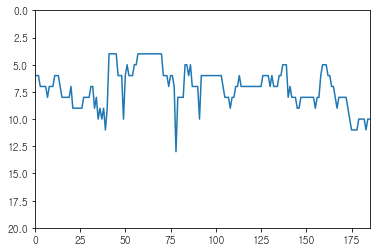

In [42]:
bg = steam_top20.loc[pc_top20['name'] == '배틀그라운드']
plt.plot(bg['week_num'], bg['rank'])
#plt.xlim(185,0)
plt.xlim(0,185)
plt.ylim(20,0)
plt.show()

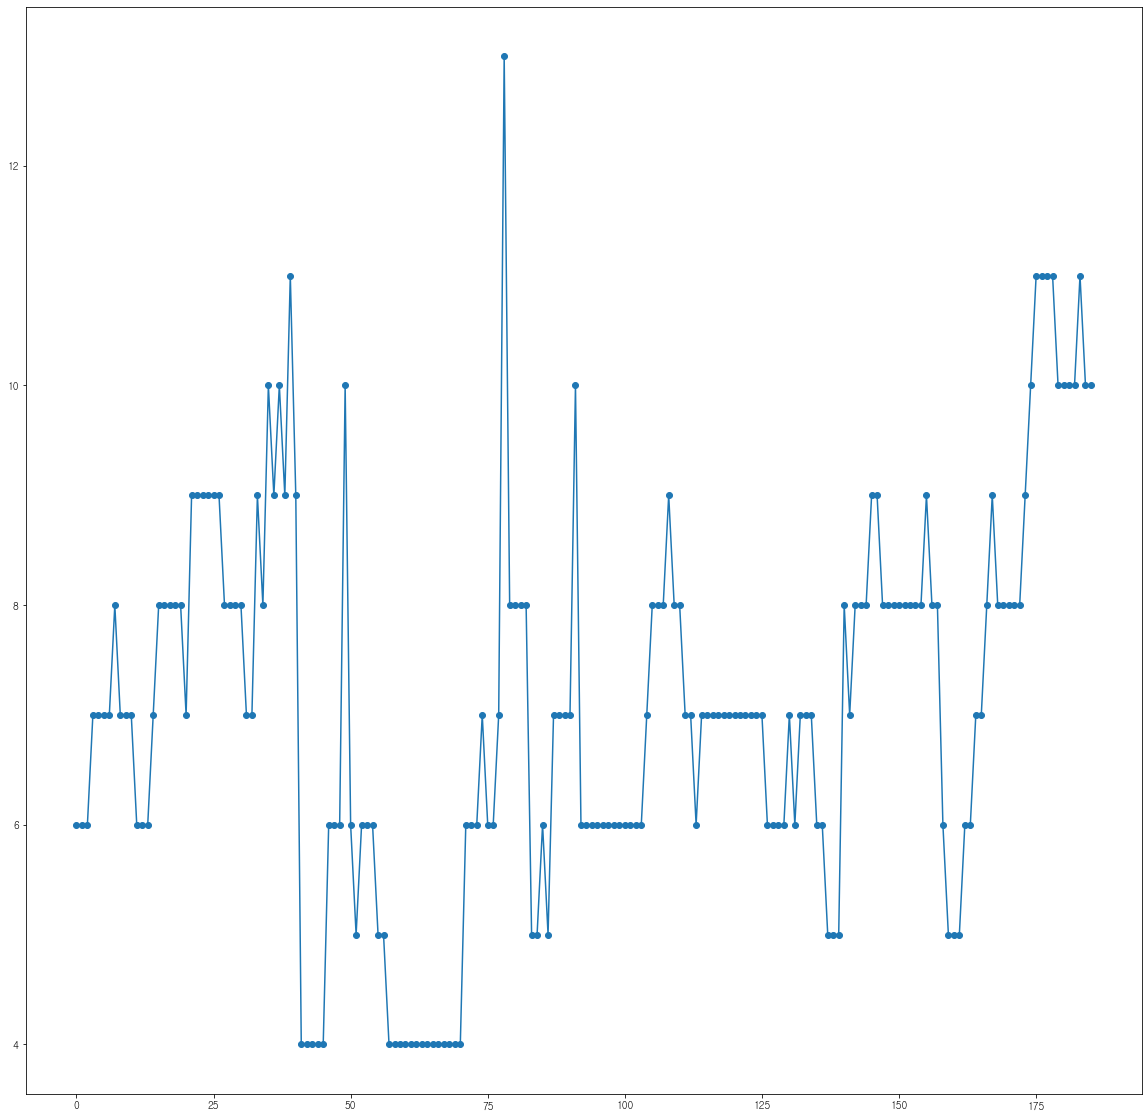

In [44]:
fig = plt.figure(figsize=(20,20)) # 캔버스 생성
fig.set_facecolor('white') # 캔버스 색상 설정
ax = fig.add_subplot() # 그림 프레임 생성

ax.plot(bg['week_num'],bg['rank'],marker='o',label='배틀그라운드')